### _Importando as bibliotecas_

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

### _Baixando os dados_

In [134]:
# Definindo os parâmetros
ticker = 'BBDC3.SA'
start_data = '2020-01-01'
end_date = '2025-10-25'

# Fazendo o download dos dados
df = yf.download(ticker, start = start_data, end = end_date )

C:\Users\dione\AppData\Local\Temp\ipykernel_26096\3603577262.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start = start_data, end = end_date )
[*********************100%***********************]  1 of 1 completed


### _Exibindo os primeiros dados e ajustando as colunas_

In [135]:
# Exibindo as 5 primeiras linhas
df.head()

Price,Close,High,Low,Open,Volume
Ticker,BBDC3.SA,BBDC3.SA,BBDC3.SA,BBDC3.SA,BBDC3.SA
Date,,,,,
2020-01-02,18.487411,18.487411,17.814478,17.913592,3753553
2020-01-03,18.198917,18.626881,18.141507,18.235450,7374538
2020-01-06,18.094543,18.198925,17.718770,18.037133,6448961
2020-01-07,17.786619,18.157173,17.723990,18.094545,2289852
2020-01-08,17.515224,17.927531,17.436938,17.786617,3265076


In [136]:
# Passo 1: redefinir as colunas usando apenas o segundo nível (Close, High, Low, etc.)
df.columns = df.columns.get_level_values(0)

# Passo 2: resetar o índice de datas, se desejar que Date vire coluna normal
df = df.reset_index(level='Date')

df['Ticker'] = ticker

In [137]:
# Exibindo as 5 primeiras linhas
df.head()

Price,Date,Close,High,Low,Open,Volume,Ticker
0,2020-01-02,18.487411,18.487411,17.814478,17.913592,3753553,BBDC3.SA
1,2020-01-03,18.198917,18.626881,18.141507,18.235450,7374538,BBDC3.SA
2,2020-01-06,18.094543,18.198925,17.718770,18.037133,6448961,BBDC3.SA
3,2020-01-07,17.786619,18.157173,17.723990,18.094545,2289852,BBDC3.SA
4,2020-01-08,17.515224,17.927531,17.436938,17.786617,3265076,BBDC3.SA


In [138]:
# Definindo a ordem das colunas
ordenacao_colunas = ['Date', 'Ticker', 'Open', 'Close', 'Low', 'High', 'Volume']
novos_nomes = ['Data', 'Ticker', 'Abertura', 'Fechamento', 'Mínima', 'Máxima', 'Volume']

# Definindo as colunas no DataFrame
df = df[ordenacao_colunas]


df = df[ordenacao_colunas]

df.columns = novos_nomes

df.head()

,Data,Ticker,Abertura,Fechamento,Mínima,Máxima,Volume
0,2020-01-02,BBDC3.SA,17.913592,18.487411,17.814478,18.487411,3753553
1,2020-01-03,BBDC3.SA,18.235450,18.198917,18.141507,18.626881,7374538
2,2020-01-06,BBDC3.SA,18.037133,18.094543,17.718770,18.198925,6448961
3,2020-01-07,BBDC3.SA,18.094545,17.786619,17.723990,18.157173,2289852
4,2020-01-08,BBDC3.SA,17.786617,17.515224,17.436938,17.927531,3265076


### _Gerando o primeiro gráfico_

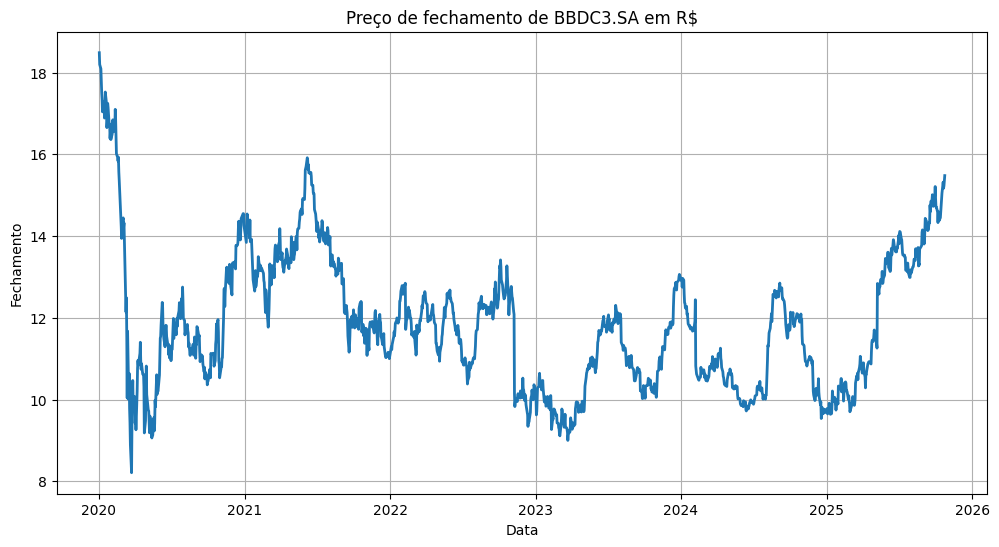

In [139]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Data'], y=df['Fechamento'], linewidth=2)
plt.title(f'Preço de fechamento de {ticker} em R$')
plt.grid()
plt.show()

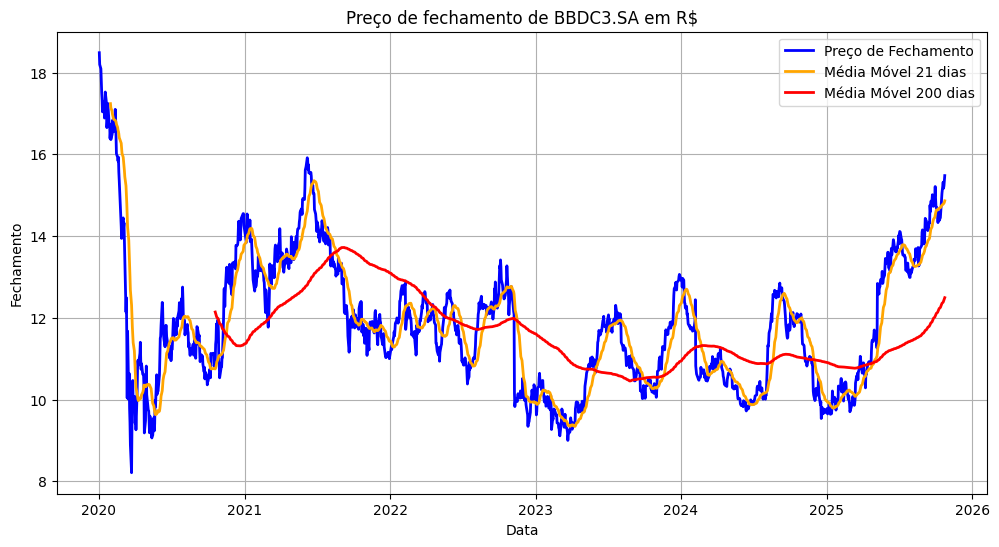

In [141]:
# Gráfico com médias moveis

# Média móvel 21 dias
df['MA_21'] = df['Fechamento'].rolling(window=21).mean()

# Média móvel 50 dias
df['MA_50'] = df['Fechamento'].rolling(window=50).mean()

# Média móvel 200 dias
df['MA_200'] = df['Fechamento'].rolling(window=200).mean()

plt.figure(figsize=(12,6))
sns.lineplot(x=df['Data'], y=df['Fechamento'],label='Preço de Fechamento', color='blue', linewidth=2)
sns.lineplot(x=df['Data'], y=df['MA_21'],label='Média Móvel 21 dias', color='orange', linewidth=2 )
sns.lineplot(x=df['Data'], y=df['MA_200'], label='Média Móvel 200 dias', color='red', linewidth=2)
plt.title(f'Preço de fechamento de {ticker} em R$')
plt.legend()
plt.grid()
plt.show()